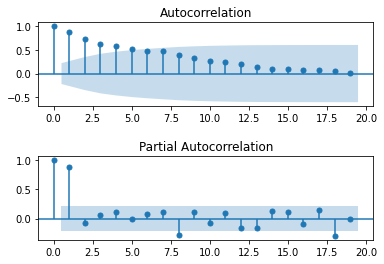

In [1]:
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
#import pandas.util.testing as tm

# load data
series = read_csv('yearly-water-usage.csv', header=0, index_col=0)

fig = pyplot.figure()
fig.subplots_adjust(hspace=0.6)
pyplot.subplot(211)
plot_acf(series, ax=pyplot.gca()) # gca -> "GetCurrentAxis"
# Plots lags on the horizontal and the correlations on vertical axis.

pyplot.subplot(212)
plot_pacf(series, ax=pyplot.gca())
pyplot.show();

In [2]:
import warnings
warnings.filterwarnings('ignore')

from pandas import read_csv
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

# load data
series = read_csv('yearly-water-usage.csv', header=0, index_col=0)

# prepare data
X = series.values
X = X.astype('float32')

train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()

for i in range(len(test)):
	# predict
	model = ARIMA(history, order=(0,1,0))
	model_fit = model.fit() 
	yhat = model_fit.forecast()[0]
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
    
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=495.579, Expected=503
>Predicted=506.769, Expected=503
>Predicted=506.675, Expected=450
>Predicted=452.293, Expected=432
>Predicted=433.810, Expected=432
>Predicted=433.767, Expected=458
>Predicted=460.318, Expected=462
>Predicted=464.356, Expected=503
>Predicted=506.196, Expected=488
>Predicted=490.809, Expected=466
>Predicted=468.292, Expected=492
>Predicted=494.776, Expected=503
>Predicted=505.940, Expected=515
>Predicted=518.118, Expected=500
>Predicted=502.769, Expected=522
>Predicted=525.132, Expected=575
>Predicted=579.056, Expected=583
>Predicted=587.127, Expected=587
>Predicted=591.125, Expected=628
>Predicted=632.772, Expected=640
>Predicted=644.897, Expected=609
>Predicted=613.288, Expected=606
>Predicted=610.167, Expected=632
>Predicted=636.525, Expected=617
>Predicted=621.210, Expected=613
>Predicted=617.079, Expected=598
>Predicted=601.781, Expected=575
>Predicted=578.369, Expected=564
>Predicted=567.152, Expected=549
>Predicted=551.881, Expected=538
>Predicted

In [ ]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
 
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(trend='nc')
		yhat = model_fit.forecast()[0] # [0] -> indicates the value of the forecast
        # see syntax of forecast function here -> 
        # http://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.forecast.html?highlight=forecast#statsmodels.tsa.arima_model.ARIMAResults.forecast
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                        print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# load data
series = read_csv('yearly-water-usage.csv', header=0, index_col=0)

# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=288.152
ARIMA(0, 0, 2) RMSE=165.005
ARIMA(0, 0, 3) RMSE=98.733
ARIMA(0, 0, 4) RMSE=76.222
ARIMA(0, 1, 1) RMSE=21.627
ARIMA(2, 1, 0) RMSE=21.426


In [ ]:
# load data
series = read_csv('yearly-water-usage.csv', header=0, index_col=0)

# prepare data
X = series.values
X = X.astype('float32')

# fit model
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit(trend='nc')
# http://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.fit.html?highlight=arima%20fit#statsmodels.tsa.arima_model.ARIMA.fit

yhat = model_fit.forecast(steps=4, alpha=0.05)
# default alpha=0.01, but we kept it as 0.05, hence 95% confidence
# check the syntax of forecast here
# http://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.forecast.html?highlight=forecast#statsmodels.tsa.arima_model.ARIMAResults.forecast

print(yhat)
# we are predicting 4 new values -> see first array
# in 2nd array -> we get the Array of the standard errors, of the forecasts.
# in 3rd array -> we get 2d array of the confidence interval for the forecast